In [1]:
import pickle
import pandas as pd
from pathlib import Path
import os
import numpy as np

In [2]:
bar_window = 15
agg_func = {
        "Close": "last",
        "High": "max",
        "Low": "min",
        "Open": "first",
        "Volume": "sum",
        "Count": "sum",
    }

BTCUSDT = pd.read_csv("/Users/bytedance/binance_data/csv_data/BTCUSDT-1m.csv", header=None,
        names=[
            "open_timestamp",
            "open_price",
            "high_price",
            "low_price",
            "close_price",
            "volume",
            "close_timestamp",
            "quote_asset_volume",
            "number_of_trade",
            "tbbav",
            "tbqav",
            "ignore",
        ],
        dtype={
            "open_timestamp": int,
            "open_price": float,
            "high_price": float,
            "low_price": float,
            "close_price": float,
            "volume": float,
            "quote_asset_volume": float,
            "tbbav": float,
            "tbqav": float,
            "close_timestamp": int,
            "number_of_trade": int,
        })

BTCUSDT = BTCUSDT.rename(
        columns={
            "close_price": "Close",
            "open_price": "Open",
            "high_price": "High",
            "low_price": "Low",
            "quote_asset_volume": "Volume",
            "number_of_trade": "Count",
        }
    )
BTCUSDT.index = pd.to_datetime(BTCUSDT["open_timestamp"] // 1_000, unit="s")
BTCUSDT = (
        BTCUSDT[["Open", "Close", "High", "Low", "Volume", "Count"]]
        .resample(
            "{}min".format(bar_window), kind="timestamp", label="right", closed="left"
        )
        .agg(agg_func)
    )



In [3]:
# v = XRPUSDT_SPOT["volume"] / XRPUSDT_SPOT["volume"].iloc[0] + 1
# v2 = XRPUSDT_PERPETURAL["volume"] / XRPUSDT_PERPETURAL["volume"].iloc[0] + 1

In [4]:
# import imp
# import pandas as pd
# import datetime
# from pathlib import Path
# import numpy as np
# # symbols = [("BTC",16_779_922_851), ("ETH",8_119_716_702), ("ETC",289_757_496), ("BCH", 2_642_154_656), ("BNB", 1_314_769_638), ("XRP", 814_017_789), ("ADA", 412_153_905), ("SOL", 917_822_261), ("DOGE", 326_135_215), ("DOT", 409_746_427), ("EOS", 224_232_521), ("AVAX", 454_288_008)]
# symbols = [("BTC",16_779_922_851), ("ETH",8_119_716_702), ("ETC",289_757_496), ("BCH", 2_642_154_656), ("BNB", 1_314_769_638), ("XRP", 814_017_789), ("ADA", 412_153_905), ("SOL", 917_822_261), ("DOGE", 326_135_215), ("DOT", 409_746_427), ("EOS", 224_232_521), ("AVAX", 454_288_008)]
# dfs = {}
# for i, a in enumerate(symbols):
#     symbol, volume = a
#     print(f"processing {symbol} ... ")
#     path1 = Path(f"/Users/bytedance/binance_data/csv_data/{symbol}USDT-1m.csv")
#     df = pd.read_csv(path1, header=None,
#             names=[
#             "open_timestamp",
#             "open_price",
#             "high_price",
#             "low_price",
#             "close_price",
#             "volume",
#             "close_timestamp",
#             "quote_asset_volume",
#             "number_of_trade",
#             "tbbav",
#             "tbqav",
#             "ignore",
#         ], dtype={
#             "open_timestamp": int,
#             "open_price": float,
#             "high_price": float,
#             "low_price": float,
#             "close_price": float,
#             "volume": float,
#             "quote_asset_volume": float,
#             "tbbav": float,
#             "tbqav": float,
#             "close_timestamp": int,
#             "number_of_trade": int,
#         },
#         index_col=0)
#     df = df.sort_index()

#     df["tbbav"] =0
#     df["tbqav"] =0
#     df["close_timestamp"] =0
#     df["number_of_trade"] =0
#     df["close_ret"] = np.log(df["close_price"]).diff(1)
#     dfs[symbol] = df

# total_df = pd.concat(dfs, axis=1, join="outer", verify_integrity=True, sort=True)
# total_df = total_df.swaplevel(0, 1, axis=1)
# total_df.fillna(inplace=True, method="ffill")
# total_df.fillna(value=0, inplace=True)
# market_df = pd.DataFrame(index=total_df.index)
# market_df["close_price"] = (total_df["close_ret"] * total_df["quote_asset_volume"]).sum(axis=1) / total_df["quote_asset_volume"].sum(axis=1)
# market_df["close_price"] = market_df["close_price"].cumsum()

In [5]:
# market_df.index = pd.to_datetime(market_df.index // 1000, unit="s")
# market_df.iloc[-100000:].plot(figsize=(20, 8))

In [6]:
# BTCUSDT["Close"].plot()

In [18]:
import sys
import os
import importlib

sys.path.insert(0, "/Users/bytedance/Desktop/vnpy/")
from research.strategies import strategy_utils as utils
import matplotlib.pyplot as plt

importlib.reload(utils)

<module 'research.strategies.strategy_utils' from '/Users/bytedance/Desktop/vnpy/research/strategies/strategy_utils.py'>

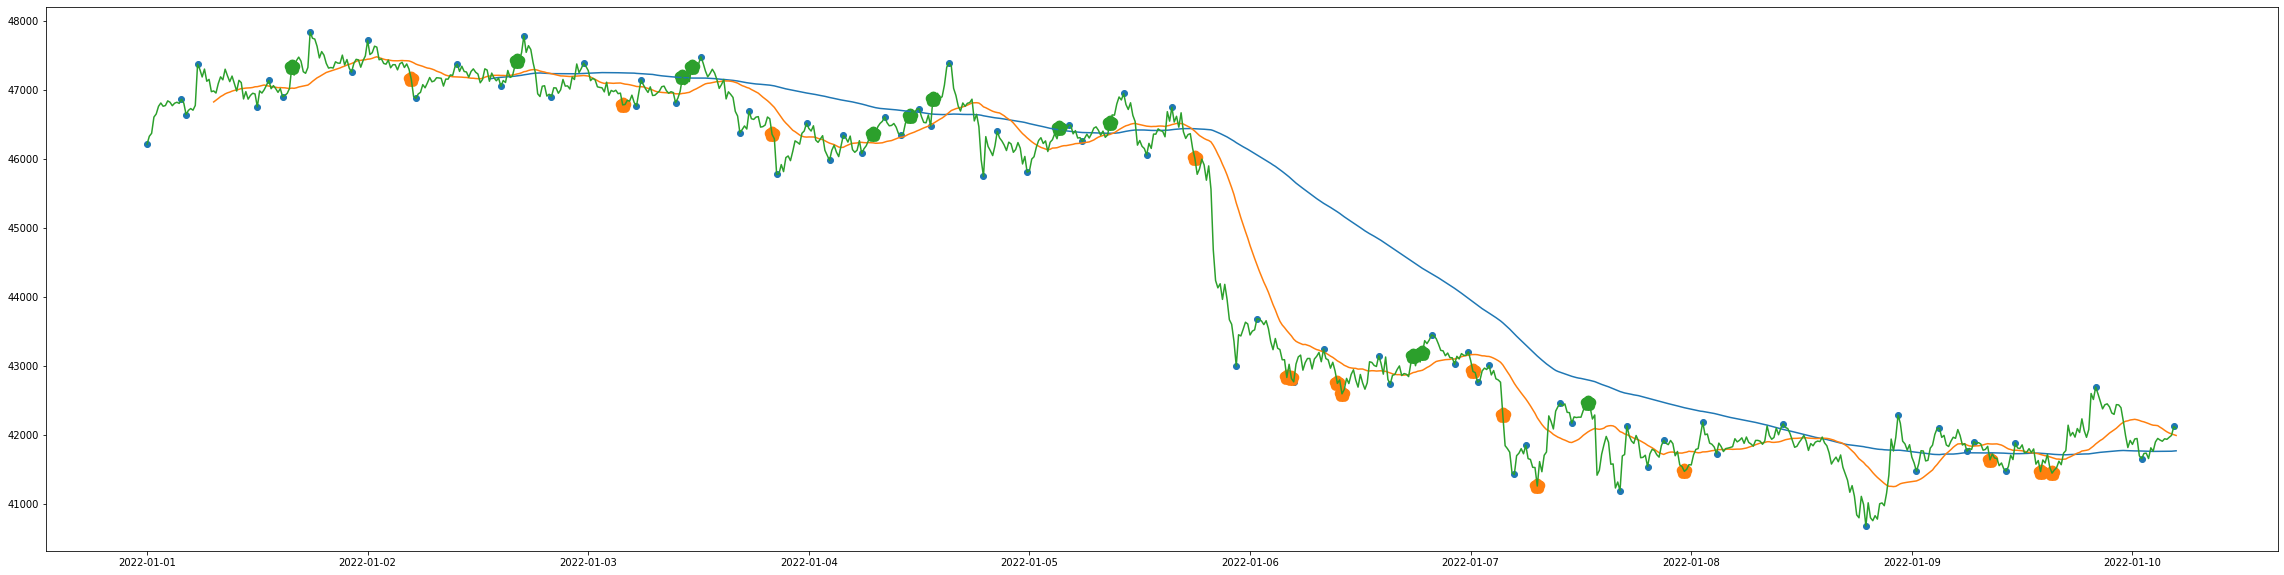

In [14]:
df = BTCUSDT.loc["2022-01-01": "2022-01-10 04:50:00"]["Close"]
zigzag_score, direction = utils.zigzag(df, 10, 10)
signal = utils.break_signal(df, 10, 10, window=50)
masked_price = np.copy(df)
masked_price2 = np.copy(df)
masked_price[signal >= 0] = np.nan
masked_price2[signal <= 0] = np.nan
f, ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(df.index, df.rolling(150).mean())
ax.plot(df.index, df.rolling(30).mean())
ax.scatter(df.index, zigzag_score)
ax.scatter(df.index, masked_price, marker="*", linewidths=10)
ax.scatter(df.index, masked_price2, marker="*", linewidths=10)
ax.plot(df.index, df.values)

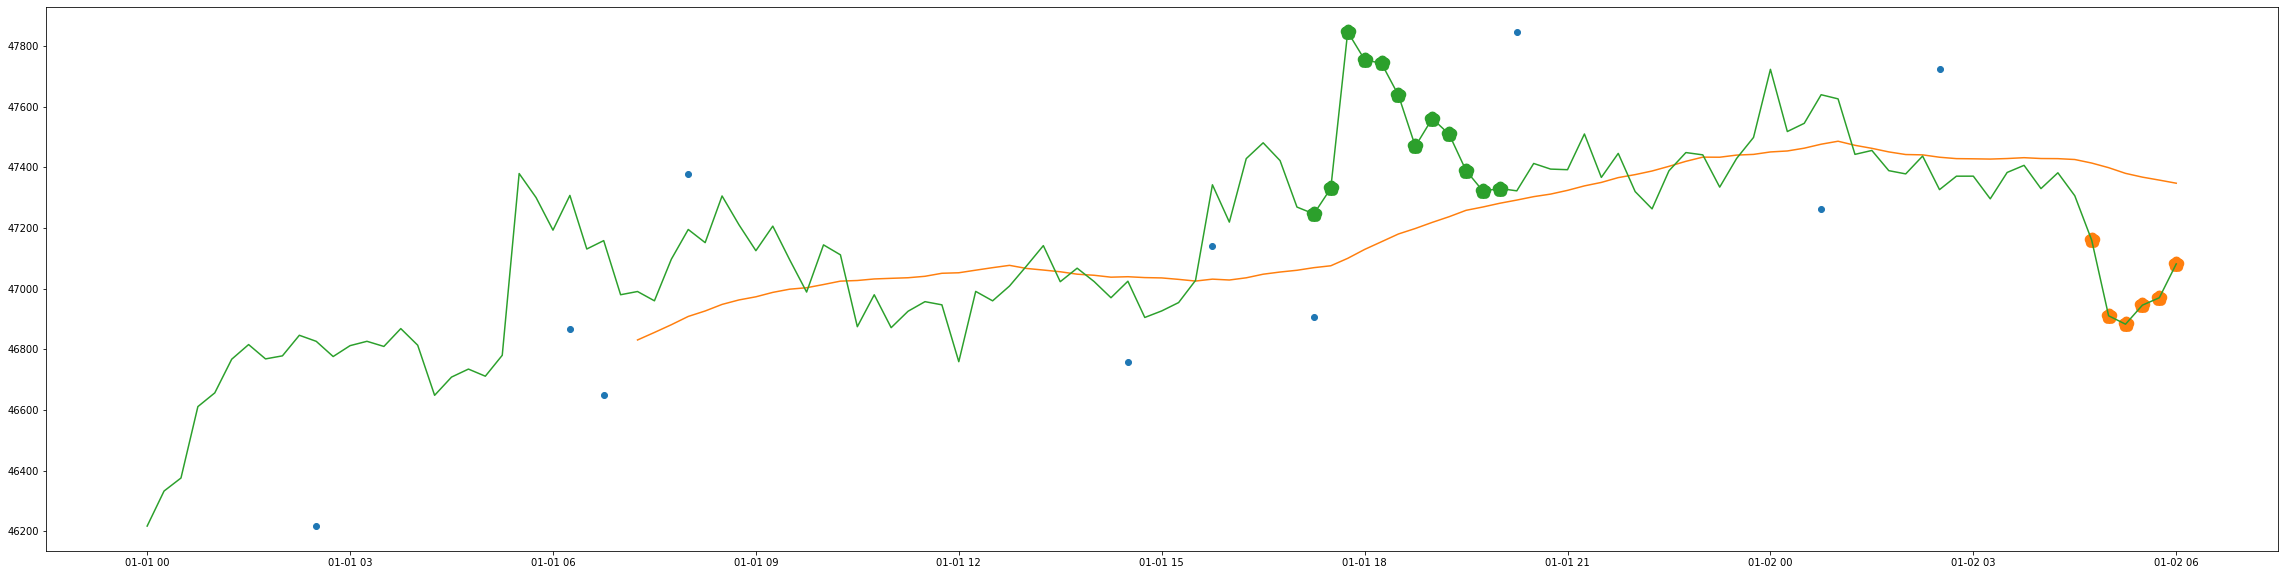

In [19]:
df = BTCUSDT.loc["2022-01-01": "2022-01-02 06:00:00"]["Close"]
zigzag_score, direction = utils.zigzag(df, 10, 10)
zigzag_score = utils.shift(zigzag_score, 10)
signal = utils.break_signal2(df, 10, 10)
masked_price = np.copy(df)
masked_price2 = np.copy(df)
masked_price[signal >= 0] = np.nan
masked_price2[signal <= 0] = np.nan
f, ax = plt.subplots(1, 1, figsize=(40, 10))
ax.plot(df.index, df.rolling(150).mean())
ax.plot(df.index, df.rolling(30).mean())
ax.scatter(df.index, zigzag_score)
ax.scatter(df.index, masked_price, marker="*", linewidths=10)
ax.scatter(df.index, masked_price2, marker="*", linewidths=10)
ax.plot(df.index, df.values)